<a href="https://colab.research.google.com/github/usharmaVNIT/4th-Year-Project/blob/main/4th_Year_Project_DNN_Structure_with_K_fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing necessary Modules

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

##Loading pre-processed Data

In [ ]:

# Reading feature vector from file
raw_data = pd.read_csv('input_final.csv')
raw_data.columns = ["F"+str(i) for i in range(1, len(raw_data.columns) + 1)]
input_size = (len(raw_data.columns))

print(raw_data.head())


# Pre-processing the data
features = raw_data.copy()
features = features.iloc[:,:-1]
labels = raw_data.iloc[:,-1:]

print(features.head())
print(labels.head())

features = np.array(features)
print(features)
labels = np.array(labels)



          F1         F2         F3  ...         F79         F80  F81
0  35.499400  33.083193  25.849665  ...   63.505595   65.460093    1
1  43.859641  43.979599  29.047297  ...   69.394777   61.907465    1
2  57.596698  53.859460  44.957618  ...  171.778668  140.954637    1
3  20.796170  25.648562  16.448069  ...   15.424094   13.909106    1
4  39.339177  36.970576  29.854623  ...   68.887880   60.629380    1

[5 rows x 81 columns]
          F1         F2         F3  ...        F78         F79         F80
0  35.499400  33.083193  25.849665  ...   6.472528   63.505595   65.460093
1  43.859641  43.979599  29.047297  ...   4.722527   69.394777   61.907465
2  57.596698  53.859460  44.957618  ...  19.067720  171.778668  140.954637
3  20.796170  25.648562  16.448069  ...   3.283942   15.424094   13.909106
4  39.339177  36.970576  29.854623  ...   8.027380   68.887880   60.629380

[5 rows x 80 columns]
   F81
0    1
1    1
2    1
3    1
4    1
[[ 35.49940025  33.08319283  25.84966455 ...   6

##Building Model Architecture
###Deep Neural Network

In [ ]:
# Initialize model
model = Sequential()

# 1 FC Layer
model.add(Dense(128 , input_shape = (input_size-1,)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# # 2 FC Layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

# # 3 FC Layer
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))


# 4 FC Layer
model.add(Dense(32))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))


# 5 FC Layer
model.add(Dense(1))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128)               10368     
_________________________________________________________________
batch_normalization_4 (Batch (None, 128)               512       
_________________________________________________________________
activation_4 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
batch_normalization_5 (Batch (None, 256)               1024      
_________________________________________________________________
activation_5 (Activation)    (None, 256)              

###Visualizing the model

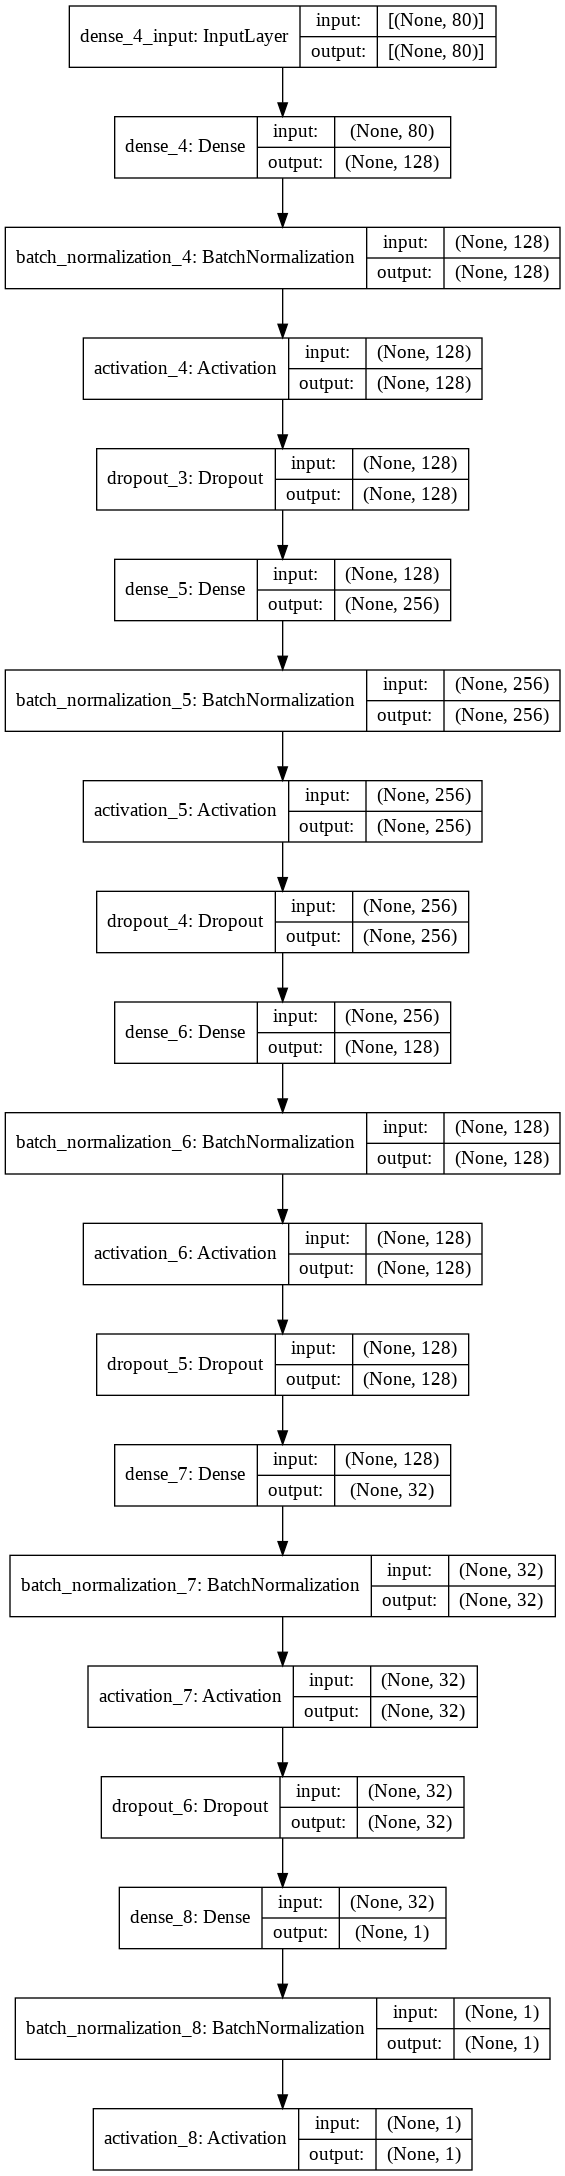

In [ ]:
# Generate the plot
plot_model(model, to_file = 'DNN-4-layer.png',
           show_shapes = True,
           show_layer_names = True)


###Creating Checkpoints to save highest accuracy

In [ ]:
batch_size = 4
epochs = 30

checkpoint = ModelCheckpoint("DNN-Adam-30Epochs-batch4-10crossFold.h5",
                             monitor="accuracy",
                             mode="max",
                             save_best_only = True,
                             verbose=0)

earlystop = EarlyStopping(monitor = 'accuracy',
                          min_delta = 0,
                          patience = 10, 
                          verbose = 0,
                          restore_best_weights = True)

callbacks = [checkpoint , earlystop]


###K Cross Fold Training

In [ ]:
# Note the checkpoint will store the data accross the loop (as the .h5 file is present . if it is not present prev value would be -inf or inf)
kfold = KFold(n_splits=10, shuffle=True)
for train, test in kfold.split(features, labels):
    history = model.fit(features[train], labels[train],
            batch_size=batch_size,
            epochs=epochs,
            verbose=0,
            validation_data = (features[test], labels[test]),
            callbacks = callbacks)


    scores = model.evaluate(features[test], labels[test], verbose=1)
    print('Test loss:', scores[0])
    print('Test accuracy:', scores[1]*100 , "%")

2/2 [==============================] - 0s 11ms/step - loss: 0.5285 - accuracy: 0.8235
Test loss: 0.52852463722229
Test accuracy: 82.35294222831726 %
2/2 [==============================] - 0s 10ms/step - loss: 0.5635 - accuracy: 0.7843
Test loss: 0.5634976029396057
Test accuracy: 78.43137383460999 %
2/2 [==============================] - 0s 9ms/step - loss: 0.5301 - accuracy: 0.8627
Test loss: 0.5301066637039185
Test accuracy: 86.27451062202454 %
2/2 [==============================] - 0s 15ms/step - loss: 0.7081 - accuracy: 0.8235
Test loss: 0.7080790400505066
Test accuracy: 82.35294222831726 %
2/2 [==============================] - 0s 10ms/step - loss: 0.5018 - accuracy: 0.7843
Test loss: 0.5017635822296143
Test accuracy: 78.43137383460999 %
2/2 [==============================] - 0s 10ms/step - loss: 0.3971 - accuracy: 0.9216
Test loss: 0.3970540463924408
Test accuracy: 92.15686321258545 %
2/2 [==============================] - 0s 8ms/step - loss: 0.5623 - accuracy: 0.8235
Test loss: 0

KeyboardInterrupt: ignored

In [ ]:
model = keras.models.load_model('DNN-Adam-30Epochs-batch4-10crossFold.h5')
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 32)                2592      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32)                128       
_________________________________________________________________
activation_15 (Activation)   (None, 32)                0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                2112      
_________________________________________________________________
batch_normalization_16 (Batc (None, 64)                256       
_________________________________________________________________
activation_16 (Activation)   (None, 64)               

In [ ]:
scores = model.evaluate(features, labels, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1]*100 , "%")

16/16 [==============================] - 0s 4ms/step - loss: 0.4965 - accuracy: 0.8524
Test loss: 0.49646618962287903
Test accuracy: 85.23622155189514 %


In [ ]:
model.predict(np.array([features[0]]))

array([[0.75010663]], dtype=float32)

In [ ]:
labels[0]

array([1])

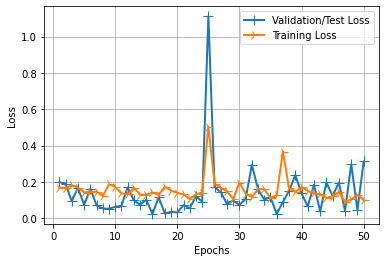

In [ ]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()


